# Will you be mAI Doc?

**Automated X-ray Anomaly Detection**

A Big Data and Cloud Computing Project by M.C. Bargo, G.K. Fontanilla, C. Rivero, and R.R. Vy | MSDS 2020

**Executive Summary**

We develop a model that automatically detects the presence of respiratory anomalies in chest X-ray scans. Around 42 gigabytes of more than 100 thousand images released by the NIH Clinical Center in 2017 are used in this study. Images are processed using the ORB algorithm to identify image keypoints whose numerical descriptors are used as features in a traditional machine learning algorithm.  Due to the difference in image appearance based on the position that the scans were taken,  separate models are trained for the AP and PA view positions. Using the XGBoost algorithm, the classifier model reaches a recall score of around 70% for the AP scans with affliction. It is shown that simpler, faster, and computationally-lighter image processing methodologies compared to deep learning techniques, especially for processing datasets of this size, can already help avoid a misdiagnosis of "No Findings" to some degree. In the future, the models can possibly be improved further by rechecking the images labels as they are only at least 90% accurate as per the source. Future researches can also explore using more computationally-intensive image feature extraction and classification algorithms, such as convolutional neural networks, to further improve the classification for this large dataset.

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></span></li><li><span><a href="#Data-Collection-and-Description" data-toc-modified-id="Data-Collection-and-Description-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data Collection and Description</a></span></li><li><span><a href="#Exploratory-Data-Analysis" data-toc-modified-id="Exploratory-Data-Analysis-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Exploratory Data Analysis</a></span><ul class="toc-item"><li><span><a href="#Raw-Data-Exploration" data-toc-modified-id="Raw-Data-Exploration-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Raw Data Exploration</a></span></li><li><span><a href="#Data-Cleaning-and-Cleaned-Data-Exploration" data-toc-modified-id="Data-Cleaning-and-Cleaned-Data-Exploration-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Data Cleaning and Cleaned Data Exploration</a></span></li></ul></li><li><span><a href="#Methods-and-Results" data-toc-modified-id="Methods-and-Results-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Methods and Results</a></span><ul class="toc-item"><li><span><a href="#Image-Feature-Extraction-Using-ORB" data-toc-modified-id="Image-Feature-Extraction-Using-ORB-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Image Feature Extraction Using ORB</a></span><ul class="toc-item"><li><span><a href="#Keypoint-Detection" data-toc-modified-id="Keypoint-Detection-4.1.1"><span class="toc-item-num">4.1.1&nbsp;&nbsp;</span>Keypoint Detection</a></span></li><li><span><a href="#Keypoint-Matching" data-toc-modified-id="Keypoint-Matching-4.1.2"><span class="toc-item-num">4.1.2&nbsp;&nbsp;</span>Keypoint Matching</a></span></li><li><span><a href="#Image-Vectorization" data-toc-modified-id="Image-Vectorization-4.1.3"><span class="toc-item-num">4.1.3&nbsp;&nbsp;</span>Image Vectorization</a></span></li></ul></li><li><span><a href="#Machine-Learning-Modeling" data-toc-modified-id="Machine-Learning-Modeling-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Machine Learning Modeling</a></span><ul class="toc-item"><li><span><a href="#Preliminaries" data-toc-modified-id="Preliminaries-4.2.1"><span class="toc-item-num">4.2.1&nbsp;&nbsp;</span>Preliminaries</a></span></li><li><span><a href="#Machine-Learning-on-Chest-X-rays-with-AP-view" data-toc-modified-id="Machine-Learning-on-Chest-X-rays-with-AP-view-4.2.2"><span class="toc-item-num">4.2.2&nbsp;&nbsp;</span>Machine Learning on Chest X-rays with AP view</a></span></li><li><span><a href="#Machine-Learning-on-Chest-X-rays-with-PA-View" data-toc-modified-id="Machine-Learning-on-Chest-X-rays-with-PA-View-4.2.3"><span class="toc-item-num">4.2.3&nbsp;&nbsp;</span>Machine Learning on Chest X-rays with PA View</a></span></li></ul></li></ul></li><li><span><a href="#Conclusions" data-toc-modified-id="Conclusions-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Conclusions</a></span></li><li><span><a href="#References" data-toc-modified-id="References-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>References</a></span></li><li><span><a href="#Acknowledgments" data-toc-modified-id="Acknowledgments-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Acknowledgments</a></span></li></ul></div>

## Introduction

Chest X-rays are considered as the primary diagnostic tool for respiratory pathology. Although computed tomography (CT) is the most accurate method for chest imaging, it has failed to surpass X-ray as the primary imaging test due as the latter is cheaper, more accessible, faster to use, and has lower levels of exposure. Unfortunately, chest X-ray results cannot independently rule-in or rule-out pulmonary diseases. A study has shown that in detecting pneumonia, the findings of X-rays and CT scans agree only 90.2% of the time (Self et al., 2013). This means that reliance on chest X-rays may lead to significant rates of misdiagnosis. 

To help radiologists come up with more accurate readings for X-ray scans, the NIH Clinical Center released a large collection of chest X-ray images in 2017. NIH hoped that this dataset will be used for the purposes of teaching computers to detect and diagnose diseases from chest X-ray images (“NIH Clinical Center provides one of the largest publicly available chest x-ray datasets to scientific community”, 2017). In the era of big data, there are many available tools and algorithms to analyze very large datasets of images and videos. For any hospital or health institution, there is the need to invest resources for infrastructure to address the growing need of storage and usage of digital files. For scaling problems of this kind, investment in cloud-based technologies have been proven to be more scalable than acquisition of physical servers and computational devices to meet the need of growing operations. Cloud computing services provides us with the ability to store and manipulate image datasets in a scale that was not previously possible (Yang and Huang, 2014). 

For this study, we develop a model that automatically detects the presence of respiratory anomalies in chest X-ray scans. We explore the use of Amazon Web Services to house an image dataset containing X-ray images and train a machine learning model that will classify whether a certain chest X-ray scan has an affliction or not. This could give health professionals a diagnostic tool to aid the detection of illnesses from those X-ray images. 

Using the ORB algorithm, we were able to identify the keypoints in X-ray scans that will be used as features in our machine learning model. Due to the difference in appearance based on the view position when taken,  separate models were trained for the AP and PA view positions.

## Data Collection and Description

In this work, we look at the dataset that the NIH Clinical Center released in 2017 through Kaggle. This 42 GB dataset includes 112,120 chest X-ray images coming from 30,805 unique patients, labeled with their corresponding diagnoses. The X-rays were taken in two different orientations: posteroanterior (PA) where the patient is facing the image receptor, and the anteroposterior view (AP) where the patient’s back is against the image receptor. PA chest view is more common than the AP chest view, and the AP view is normally of less quality in comparison to the PA view. However, the AP view is used as an alternative to PA view when the patient is too unwell to stand. 

The latest version of this dataset is around 42 GB worth of image data, resized to 1024 x 1024 pixels for uniformity (National Institutes of Health Chest X-Ray Dataset, 2018). Natural language processing was used to text-mine the diagnoses from the associated radiological reports (Wang et al., 2017). The images are classified into 15 classes (14 diseases and one for “No findings”), some of which can fall under one or more disease classes. The diseases detected in this dataset include: 
* Atelectasis 
* Cardiomegaly  
* Consolidation 
* Edema 
* Effusion  
* Emphysema 
* Fibrosis  
* Hernia  
* Infiltration 
* Mass  
* Nodule  
* Pleural thickening  
* Pneumonia  
* Pneumothorax 

Since these radiology reports were not anticipated to be publicly shared, some of the diagnoses based from these image might be erroneous and are only at least 90% accurate (Self et al., 2013) and may require another look by a specialist. However, we assume that the diagnoses indicated in this dataset are 100% accurate for the purposes of this study. 

## Exploratory Data Analysis

In this section, we discuss the features of the dataset and the steps that were taken to prepare the data for analysis. We import the necessary libraries in the cell below. 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

### Raw Data Exploration

The cell below reads the CSV file that summarizes the data in the accompanying chest X-ray images. We also look at characteristics of the columns in this CSV file.

In [3]:
raw = pd.read_csv('/mnt/data/public/nih-chest-xrays/Data_Entry_2017.csv',
                   usecols=['Image Index', 'Finding Labels', 'Patient ID',
                            'Patient Age', 'Patient Gender', 'View Position'])

In [7]:
pd.DataFrame({'Data Types':raw.dtypes, 'Total Count':raw.count(),
              'Unique Values':raw.nunique()})

,Data Types,Total Count,Unique Values
Image Index,object,112120,112120
Finding Labels,object,112120,836
Patient ID,int64,112120,30805
Patient Age,int64,112120,107
Patient Gender,object,112120,2
View Position,object,112120,2


Note that there are 112,120 images in this dataset coming from 30,805 unique patients (based on Patient ID). Both genders are represented in the dataset and the age range seems to be quite large (having 107 unique values). We also notice that there is a mixture of two different view positions (AP and PA) in the dataset. 

There are 836 unique labels since it is possible to classify an image under multiple disease labels.  We take a closer look at the “Finding Labels” column and determine how many images are labeled as “No Finding.” 

In [90]:
raw['Finding Labels'].unique()

array(['Cardiomegaly', 'Cardiomegaly|Emphysema', 'Cardiomegaly|Effusion',
       'No Finding', 'Hernia', 'Hernia|Infiltration', 'Mass|Nodule',
       'Infiltration', 'Effusion|Infiltration', 'Nodule', 'Emphysema',
       'Effusion', 'Atelectasis', 'Effusion|Mass',
       'Emphysema|Pneumothorax', 'Pleural_Thickening',
       'Effusion|Emphysema|Infiltration|Pneumothorax',
       'Emphysema|Infiltration|Pleural_Thickening|Pneumothorax',
       'Effusion|Pneumonia|Pneumothorax', 'Pneumothorax',
       'Effusion|Infiltration|Pneumothorax', 'Infiltration|Mass',
       'Infiltration|Mass|Pneumothorax', 'Mass',
       'Cardiomegaly|Infiltration|Mass|Nodule',
       'Cardiomegaly|Effusion|Emphysema|Mass',
       'Atelectasis|Cardiomegaly|Emphysema|Mass|Pneumothorax',
       'Emphysema|Mass', 'Emphysema|Mass|Pneumothorax',
       'Atelectasis|Pneumothorax', 'Cardiomegaly|Emphysema|Pneumothorax',
       'Mass|Pleural_Thickening', 'Cardiomegaly|Mass|Pleural_Thickening',
       'Effusion|Infiltra

In [91]:
temp = raw[raw['Finding Labels']=='No Finding'].shape[0]/raw.shape[0]
print(f'Ratio of scans without findings = {temp:0.3f}')

Ratio of scans without findings = 0.538


The X-ray images having no findings and those with detected diseases are more or less equally distributed. 

We now look at the gender distribution of the patients included in this dataset. 

In [92]:
raw.groupby('Patient Gender').size()/raw.shape[0]

Patient Gender
F    0.43507
M    0.56493
dtype: float64

Both genders are more or less equally distributed as well.

We also look at the distribution of the view positions of this dataset.

In [93]:
raw.groupby('View Position').size()/raw.shape[0]

View Position
AP    0.399661
PA    0.600339
dtype: float64

Note that there are significantly more X-ray images taken in the PA position (the more common of the two) rather than the AP position.

We now take a closer look at the “Patient Age” column below. 

In [96]:
print('Unique Ages on record:')
np.array(sorted(raw['Patient Age'].unique(), reverse=True))

Unique Ages on record:


array([414, 413, 412, 411, 155, 154, 153, 152, 151, 150, 149, 148,  95,
        94,  93,  92,  91,  90,  89,  88,  87,  86,  85,  84,  83,  82,
        81,  80,  79,  78,  77,  76,  75,  74,  73,  72,  71,  70,  69,
        68,  67,  66,  65,  64,  63,  62,  61,  60,  59,  58,  57,  56,
        55,  54,  53,  52,  51,  50,  49,  48,  47,  46,  45,  44,  43,
        42,  41,  40,  39,  38,  37,  36,  35,  34,  33,  32,  31,  30,
        29,  28,  27,  26,  25,  24,  23,  22,  21,  20,  19,  18,  17,
        16,  15,  14,  13,  12,  11,  10,   9,   8,   7,   6,   5,   4,
         3,   2,   1])

There seems to be some typographical errors in this dataset since there are patients with ages 148 to 414. We plot the histogram of the patient age in the cell below.

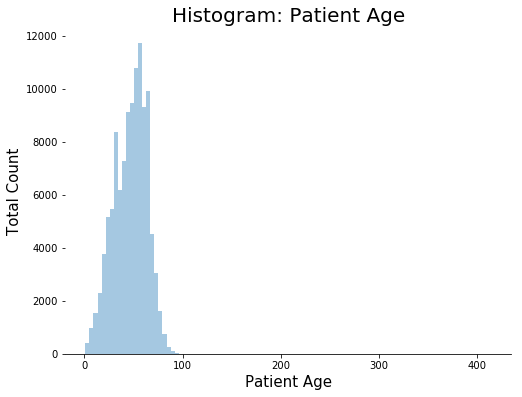

In [95]:
fig, ax = plt.subplots(figsize=(8,6))
ax = sns.distplot(raw['Patient Age'], bins=100, kde=False, ax=ax)
ax.set_title('Histogram: Patient Age', fontsize=20)
ax.set_xlabel('Patient Age', fontsize=15)
ax.set_ylabel('Total Count', fontsize=15)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_color('black')

### Data Cleaning and Cleaned Data Exploration

In this study, we only consider the X-ray scans of adult patients, those whose ages fall between 18 and 100.

In [4]:
df = raw[(raw['Patient Age']>18) & (raw['Patient Age']<100)]

As there are 836 unique labels (since most x-ray scans have more than one respiratory diagnosis), the labels were converted to binary targets - scans with findings are re-encoded as `1` while scans with no findings are re-encoded as `0`. We put these new labels under the column `target`.

In [6]:
df.loc[:,'target'] = df.loc[:,'Finding Labels'].apply(lambda x: 0 if x=='No Finding' else 1)

We now look at how many images are left after imposing these restrictions.

In [48]:
print(f'Number of images to analyze = {df.shape[0]}')

Number of images to analyze = 106163


We once again look at the distribution of the binary labels of the reduced dataset.

In [7]:
df.groupby('target').size()/df.shape[0]

target
0    0.535723
1    0.464277
dtype: float64

There are no significant changes in the ratio of images labeled as “No Finding”.

We once again look at the gender distribution of the reduced dataset

In [110]:
df.groupby('Patient Gender').size()/df.shape[0]

Patient Gender
F    0.435462
M    0.564538
dtype: float64

There are no significant changes in the gender distribution in the reduced dataset.

We also look at the distribution of the view position in the reduced dataset.

In [111]:
df.groupby('View Position').size()/df.shape[0]

View Position
AP    0.394865
PA    0.605135
dtype: float64

There are no significant changes in the distribution of the view position as well.

We now look at the distribution of the patient ages in the cells below. 

In [49]:
print('Unique Ages on record:')
np.array(sorted(df['Patient Age'].unique(), reverse=True))

Unique Ages on record:


array([95, 94, 93, 92, 91, 90, 89, 88, 87, 86, 85, 84, 83, 82, 81, 80, 79,
       78, 77, 76, 75, 74, 73, 72, 71, 70, 69, 68, 67, 66, 65, 64, 63, 62,
       61, 60, 59, 58, 57, 56, 55, 54, 53, 52, 51, 50, 49, 48, 47, 46, 45,
       44, 43, 42, 41, 40, 39, 38, 37, 36, 35, 34, 33, 32, 31, 30, 29, 28,
       27, 26, 25, 24, 23, 22, 21, 20, 19])

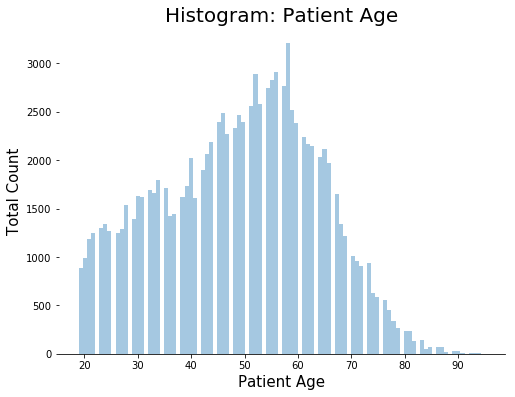

In [50]:
fig, ax = plt.subplots(figsize=(8,6))
ax = sns.distplot(df['Patient Age'], bins=100, kde=False, ax=ax)
ax.set_title('Histogram: Patient Age', fontsize=20)
ax.set_xlabel('Patient Age', fontsize=15)
ax.set_ylabel('Total Count', fontsize=15)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_color('black')

We observe the peak of the histogram between the ages of 50 to 60, and then drops drastically after age 70. 

It is also interesting to observe the distribution of the target labels per gender. 

In [132]:
temp = pd.crosstab(df.target, df['Patient Gender'], margins=True, margins_name='Total')
temp = temp.apply(lambda x: x/temp.loc['Total',:], axis=1)
temp

Patient Gender,F,M,Total
target,,,
0,0.538135,0.533863,0.535723
1,0.461865,0.466137,0.464277
Total,1.000000,1.000000,1.000000


There is no difference between the ratios of labels in terms of gender.

We also look at the ratio of target labels per view position.

In [133]:
temp = pd.crosstab(df.target, df['View Position'], margins=True, margins_name='Total')
temp = temp.apply(lambda x: x/temp.loc['Total',:], axis=1)
temp

View Position,AP,PA,Total
target,,,
0,0.469275,0.579083,0.535723
1,0.530725,0.420917,0.464277
Total,1.000000,1.000000,1.000000


For the AP view, 53% of scans has findings. On the other hand, only 42% of scans has findings in the PA view. Given that the PA view is normally of better quality compared with the AP view, we will do separate machine learning models for the PA view and the AP view.

## Methods and Results

Convolutional neural networks are popularly used to learn spatial features of images to help in image classification (Aggarwal, 2018). In the medical field, this has been used to classify images for macular degeneration and diabetic retinopathy (D.S. Kermany et al., 2018). However, we deviate from using a convolutional neural network due to the processing power required to process a dataset of this size. Instead, we test the feasibility of using a simpler, faster, and less computationally-intensive image feature extraction technique in conjunction with traditional machine learning to train a model that can detect whether a chest X-ray scan is afflicted with a disease or not. Moreover, the model was trained in parallel using Dask to reduce computational resources. We hope that the size of the dataset is enough to train a machine learning model to detect anomalies in chest X-ray images. 

For feature extraction, we use the Oriented Fast and Rotated Brief (ORB). This is implemented using OpenCV, an open-sourced image processing library in Python. Once the important features are extracted from the images, the keypoints are vectorized to a format readable by a machine learning algorithm. These vectorized keypoints are then converted to multiple parquet files for a faster processing of the data. These parquet files are used to train a parallelized XGBoost.

### Image Feature Extraction Using ORB

Open Source Computer Vision Library (more popularly known as OpenCV) is an open source python library containing functions of state-of-the-art computer vision and machine learning algorithms. The library was built to simplify the implementation of image processing algorithm and accelerate its use for commercial products. It has more than 2500 optimized algorithms, including the ORB algorithm which was used for feature extraction in this project. OpenCV can be used on different programming languages like C++, C#, Java, MATLAB and Python. 

ORB is the integration of two image feature extraction algorithm in OpenCV, namely: 
* Features from Accelerated and Segments Test (FAST) keypoint detector, and 
* Binary Robust Independent Elementary Feature (BRIEF) descriptor, with many modifications to enhance the performance. 

Keypoints are detected using FAST, then finds the most relevant keypoints among them. The BRIEF algorithm converts the keypoints to descriptors which represents the object (Tyagi, 2019). Features extracted by ORB are considered generally scale invariant, rotation invariant, and noise resistant.

We now import the necessary packages to do machine learning on our dataset. 

In [51]:
import cv2
import shutil

#### Keypoint Detection

The cells below demonstrate the use of OpenCV and ORB to extract keypoints in two sample X-ray scans. 

In [ ]:
def detect_keypoints(img_name, data, method='orb'):
    """Detects feature keypoints of an image.
    
    Parameters:
    -----------
    img_name : str
        File name of image to visualize.
    data : pd.DataFrame
        Contains metadata of `img_name`.
    method : str ('orb', 'brisk', 'kaze')
        Feature point detector and descriptor algorithm. Could either be ORB
        (Oriented FAST and rotated BRIEF), BRISK (Binary Robust Invariant 
        Scalable Keypoints), or KAZE.
    
    Returns:
    --------
    image : np.ndarray
        Numeric representation of the image
    kp : list
        List of detected keypoints (varies per image)
    des : np.ndarray
        Array of descriptor values per keypoint, dimension is (number of 
        keypoints detected, length of method descriptor per keypoint)
    """
    alg = {'orb': cv2.ORB_create(), 
           'brisk': cv2.BRISK_create(),
           'kaze': cv2.KAZE_create()}
    image = cv2.imread(f'/mnt/data/public/nih-chest-xrays/images/{img_name}', 0)
    kp, des = alg[method].detectAndCompute(image, None)
    return (image, kp, des)

In [78]:
def draw_keypoints(img_name, data, method='orb'):
    """Visualize feature keypoints of an image.
    
    Parameters:
    -----------
    img_name : str
        File name of image to visualize.
    data : pd.DataFrame
        Contains metadata of `img_name`.
    method : str ('orb', 'brisk', 'kaze')
        Feature point detector and descriptor algorithm. Could either be ORB
        (Oriented FAST and rotated BRIEF), BRISK (Binary Robust Invariant 
        Scalable Keypoints), or KAZE.
    """
    image, kp, des = detect_keypoints(img_name, data, method)
    img_with_kp = cv2.drawKeypoints(image, kp[-50:], outImage=np.array([]),
                                color=(0, 0, 255),
                                flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
    
    fig, ax = plt.subplots(1,2, dpi=150)
    fig.tight_layout()
    ax[0].imshow(image, cmap='gray')
    ax[0].set_title('Raw Image')
    ax[1].imshow(img_with_kp)
    ax[1].set_title(f'With {method.upper()} Keypoints')
    ax[0].axis('off'); ax[1].axis('off')
    info = data[data['Image Index']==img_name]
    fig.suptitle(f"Patient No.{info['Patient ID'].values[0]} with "
                 f"{info['Finding Labels'].values[0]}")
    fig.show()

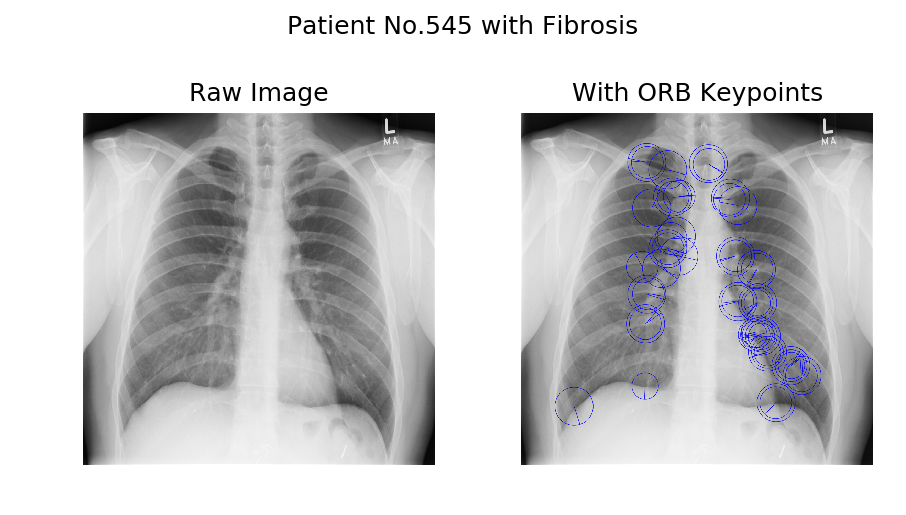

In [79]:
draw_keypoints('00000545_004.png', df, method='orb')

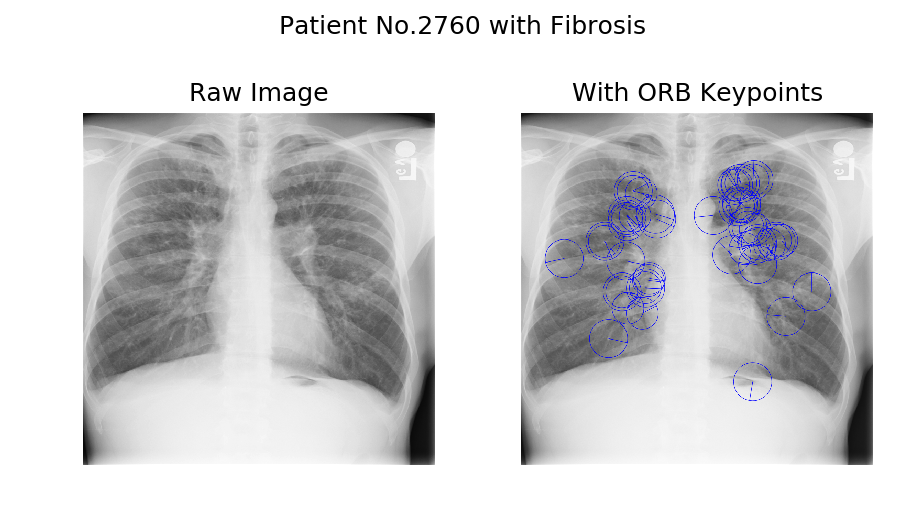

In [81]:
draw_keypoints('00002760_000.png', df, method='orb')

#### Keypoint Matching

The ORB algorithm returns a large number of features from each image. Now, considering that the images are very similar from one another, the keypoints obtained from ORB should also contain similarities. This is the logic behind keypoint matching. Keypoint Matching simply compares 2 sets of features and stick with the pairs that show more similarity. 

With OpenCV, feature matching requires a Matcher object. The <i>Brute Force (BF) Matcher</i> was used in this work. The BF matcher does exactly what it’s name suggests. Given 2 sets of features (from image A and image B), each feature from set A is compared against all features from set B.  Thus, for every feature in set A, it returns the closest feature from set B. By default, BF matcher computes the similarity between the keypoints by calculating the Euclidean distance between two points.  

The function defined below is based on the code by Silva (2019).

In [129]:
def draw_matches(img1_name, img2_name, data, method='orb', n_matches=20):
    """Visualize feature keypoint matches between 2 images.
    
    Parameters:
    -----------
    img1_name, im2_name : str
        File names of images to match.
    data : pd.DataFrame
        Contains metadata of `img_name`.
    method : str ('orb', 'brisk', 'kaze')
        Feature point detector and descriptor algorithm. Could either be ORB
        (Oriented FAST and rotated BRIEF), BRISK (Binary Robust Invariant 
        Scalable Keypoints), or KAZE.
    n_matches : int
        Number of matches to draw
    """
    sample = data[data['Image Index'].isin([img1_name, img2_name])]
    img1, kp1, des1 = detect_keypoints(img1_name, data=data, method=method)
    img2, kp2, des2 = detect_keypoints(img2_name, data=data, method=method)

    bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
    matches = bf.match(des1, des2)
    # Sort matches by distance.  Best come first.
    matches = sorted(matches, key = lambda x: x.distance)

    img_matches = cv2.drawMatches(img1, kp1, img2, kp2,
                                      matches[:n_matches], img2, flags=2)
    fig, ax = plt.subplots(dpi=300)
    ax.imshow(img_matches)
    ax.axis('off')
    ax.set_title(f"Patient No. {sample['Patient ID'].values[0]} and " 
                 f"{sample['Patient ID'].values[1]} with "
                 f"{str(set(sample['Finding Labels']))}")
    fig.show()

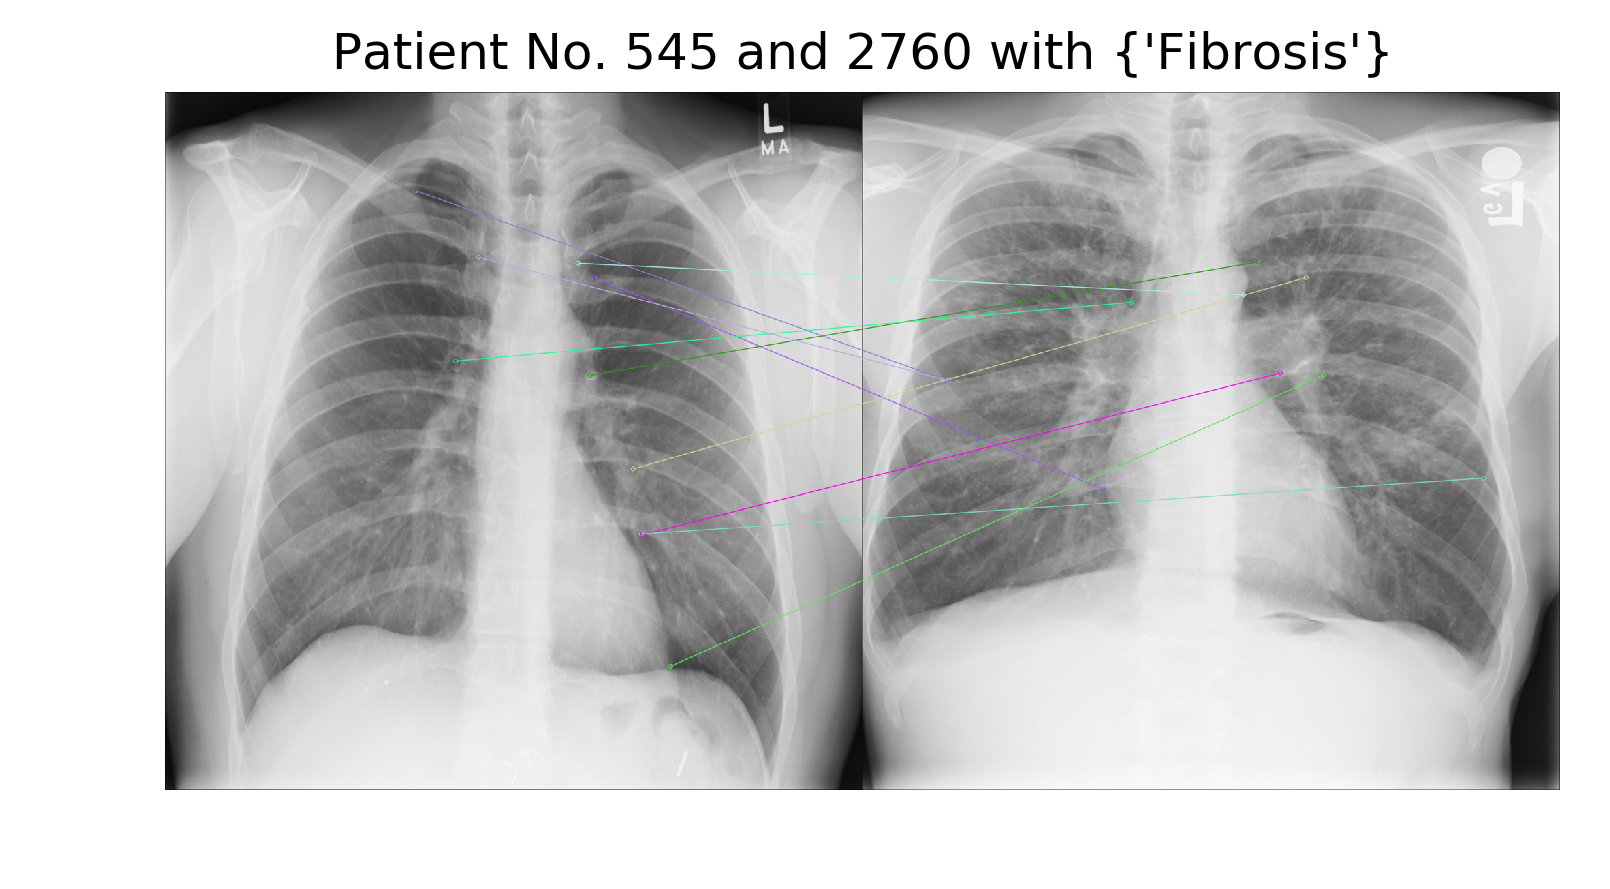

In [130]:
draw_matches('00000545_004.png', '00002760_000.png', df, 'orb', 10)

#### Image Vectorization

Implementing the ORB algorithm to an image returns an a list of detected keypoints, with a 32-length vector representation of each keypoint's descriptors. The number of detected keypoints vary per image, so only the top 32 keypoints based on keypoint response were used for modeling (zero-padding was used if the detected keypoints is less than this value). Thus, for each image we extract two-dimensional feature matrix containing 32 columns (descriptors) and 32 rows (top keypoints).  While this feature vector alone is easily readable by a machine learning algorithm, having hundreds of thousands of these stacked on top of each other increases the dimensionality of the dataset. As a workaround, these feature matrices were flattened to one dimension and then stacked on each other. As a result, one datapoint contains 1024 features that will be used for training of the machine learning model. 

The cells below convert the images to numeric vectors for machine learning model training. The code `extract_features` is roughly based on the implementation of Nikishaev (2018).

In [11]:
def extract_features(img_name, img_source='local_network', method='orb', num_keypoints=32):
    """Extracts numeric features from and image, from descriptors of the top
    keypoints detected in the image using feature detector algorithms.
    
    Parameters:
    -----------
    img_name : str
        File name of the image, excluding path.
    img_source : str ('local_network', 'aws_s3')
        Location of images; hardcoded.
    method : str ('orb', 'brisk', 'kaze')
        Feature point detector and descriptor algorithm. Could either be ORB
        (Oriented FAST and rotated BRIEF), BRISK (Binary Robust Invariant 
        Scalable Keypoints), or KAZE.
    num_keypoints : int
        Number of top keypoints (by response) to consider.
    
    Returns:
    --------
    dsc : ndarray
        1D Array of descriptor values of top keypoints.
    """
    
    if img_source=='local_network':
        path = '/mnt/data/public/nih-chest-xrays/images/'
        # Read image files in grayscale
        image = cv2.imread(f'{path}{img_name}', 0)
        
    elif img_source=='aws_s3':  # AWS S3 Bucket
        s3 = boto3.resource('s3')
        bckt = s3.Bucket('bdcc-gfontanilla-2020')
        obj = bckt.Object(f'images/{img_name}')
        # Create temporary files to not overload memory
        tmp = tempfile.NamedTemporaryFile()
        with open(tmp.name, 'wb') as f:
            obj.download_fileobj(f)
            # Read image files in grayscale
            image = cv2.imread(tmp.name, 0)
    else:
        print("Image source error. Use `local_network` or `aws_s3`.")
        return
   
    try:
        # Choose Feature Detector Algorithm
        if method=='orb':
            alg = cv2.ORB_create()
            s = 32    # number of ORB descriptors per keypoint
        if method=='brisk':
            alg = cv2.BRISK_create()
            s = 64    # number of BRISK descriptors per keypoint
        if method=='kaze':
            alg = cv2.KAZE_create()
            s = 64    # number of KAZE descriptors per keypoint
        
        # Find image keypoints
        kps = alg.detect(image)
        
        # Number of keypoints detected varies per image
        # Get only top `num_keypoints` based on reponse value (bigger is better)
        kps = sorted(kps, key=lambda x: -x.response)[:num_keypoints]
        
        # Get descriptors of top keypoints
        kps, dsc = alg.compute(image, kps)
        
        # Make the image feature vector a 1D array of uniform length  
        needed_length = (num_keypoints * s)
        if dsc is not None:
            dsc = dsc.flatten()
        else:
            dsc = np.zeros(needed_length)
        # Right-pad vector if keypoints detected is less than num_keypoints
        if dsc.size < needed_length:
            dsc = np.concatenate([dsc, np.zeros(needed_length - dsc.size)])
            
    except cv2.error as e:
        print('Error: ', e)
        return None

    return dsc

In [38]:
def parquet_vectors(data, view, batch=100000, method='orb', num_keypoints=32):
    """Saves the vectorized images into parquet files in batches.
    
    Parameters:
    -----------
    data : pd.DataFrame
        Subsetted medata to process.
    view : str ('AP', 'PA')
        X-ray view position when taken, for subsetting.
    batch : int
        Max number of images to process per parquet file.
    method : str ('orb', 'brisk', 'kaze')
        Feature point detector and descriptor algorithm. Could either be ORB
        (Oriented FAST and rotated BRIEF), BRISK (Binary Robust Invariant 
        Scalable Keypoints), or KAZE.
    num_keypoints : int
        Number of top keypoints (by response) to consider.
    
    Returns:
    --------
    parquet
        Parquet files of the image vectors.
    """
    
    # Subset data according to view position
    subset = data[data['View Position']==view]
    all_files = subset['Image Index'].values
    targets = subset.target
    
    # Get vector length per image
    dsc_length = {'orb':32, 'brisk':64, 'kaze':64}
    vector_length = num_keypoints*dsc_length[method]
    
    start = 0
    for b in range(int(np.ceil(all_files.size/batch))):
        end = start + batch
        files = all_files[start:end]
        
        # Prepare empty array for targets and vectors
        temp = np.zeros((files.size, 1+vector_length))

        # Fill-out array
        temp[:,0] = targets[start:end]
        for i in range(files.size):
            temp[i,1:] = extract_features(files[i], method=method, 
                                          num_keypoints=num_keypoints)

        # Save Feature Vectors as Parquet files
        try:
            os.mkdir('vector_data')
        except:
            pass
        finally:
            df_vectors = pd.DataFrame(temp, columns=['target']\
                            + [f'V{i:04}' for i in range(vector_length)])
            df_vectors.to_parquet(f'vector_data/{view}_{b:02}.parquet',
                                  compression='gzip', engine='fastparquet')

        start = end

In [63]:
parquet_vectors(df, view='AP')

In [64]:
parquet_vectors(df, view='PA')

In [54]:
# Zip parquet files
shutil.make_archive('vector_data', 'zip', 'vector_data')

'/home/msds2020/crivero/bdcc-project/vector_data.zip'

### Machine Learning Modeling

XGBoost, which stands for eXtreme Gradient Boosting, is an algorithm known for its high accuracy for structured data. It is an implementation of the gradient boosting decision tree algorithm, but it was optimized for efficiency of computing time and memory resources (Brownlee, 2016). 

We run XGBoost to train the classifier model for detecting anomalies in chest X-ray scans. We test several combinations of the hyperparameters by trial-and-error and GridSearch. Only the results with the best balance of overall accuracy and F1-score for both classes are shown below.

#### Preliminaries

We first import the necessary libraries in the cell below.

In [2]:
import numpy as np
import pandas as pd
import shutil

import dask
import dask.dataframe as dd
from dask.distributed import Client

import joblib
import xgboost as xgb
from dask_ml import xgboost as dask_xgb
from sklearn.metrics import classification_report
from sklearn.metrics import fbeta_score

We now load the data processed earlier to the variable `vector_data`.

In [3]:
# Unzip parquet files to current working directory
shutil.unpack_archive("vector_data.zip", 'vector_data')

We define the function that computes for the proportion chance criterion, which serves as a baseline for us to assess the accuracy of the classifier model.

In [2]:
def get_pcc(y):
    """Return proportional chance criterion."""
    length = len(y)
    ones = y.sum()
    return (ones/length)**2 + ((length-ones)/length)**2

We now set up the dask cluster where the classifier model will be trained.

In [3]:
try:
    client.close()
except:
    pass
finally:
    cloud_ip_port = '172.31.28.128:8786'
    client = Client(cloud_ip_port)
client

Client Scheduler: tcp://172.31.28.128:8786 Dashboard: http://172.31.28.128:8080/status,Cluster Workers: 16 Cores: 32 Memory: 83.34 GB


We are now ready to build our classifier model to detect anomalies in chest X-ray scans. Due to the difference in appearance of the AP and PA view scans, the accuracy might suffer if these scans are combined to build a single classifier model. Hence, we will build separate models for them to maximize the accuracy, precision and recall of the models.

#### Machine Learning on Chest X-rays with AP view

We first build our classifier model on chest X-rays with AP view. We load the dataset restricted to X-ray scans with AP view and determine how many scans are included in the dataset.

In [4]:
AP = dd.read_parquet('vector_data/AP*.parquet')
print(f'Number of AP images = {AP.shape[0].compute()}')

Number of AP images = 41920


We split the data into training set and test set, using an 80%-20% split.

In [5]:
# Split train and test set
train, test = AP.random_split(frac=[0.8, 0.2], random_state=1208)
X_train = train.iloc[:,1:].to_dask_array()
X_test = test.iloc[:,1:].to_dask_array()
y_train = train.target.values
y_test = test.target.values

In [6]:
y_train_vals = y_train.compute()
y_test_vals = y_test.compute()

We compute for the necessary PCC score that the model needs to beat.

In [7]:
print(f'AP Train PCC = {get_pcc(y_train_vals):0.1%}')
print(f'AP Test PCC = {get_pcc(y_test_vals):.1%}')

AP Train PCC = 50.2%
AP Test PCC = 50.3%


We now make use of XGBoost to train our classifier model. After several trials, the result which returned the best balance of overall accuracy with F1-score of both classes used the parameters `max_depth` = 5, `learning_rate` = 0.01, and `n_estimators` = 500. The evaluation metrics are shown in the cell below.

In [8]:
est = xgb.XGBClassifier(
    max_depth=5,
    learning_rate=0.01, 
    n_estimators=500,
    n_jobs=-1,
    random_state=0
)
with joblib.parallel_backend('dask'):
    est.fit(X_train, y_train_vals)
y_pred = est.predict(X_test)

print(classification_report(y_test_vals, y_pred))
print(f'F2 score = {fbeta_score(y_test_vals, y_pred, beta=2):0.2f}')

              precision    recall  f1-score   support

         0.0       0.51      0.36      0.42      3812
         1.0       0.56      0.70      0.63      4449

    accuracy                           0.55      8261
   macro avg       0.54      0.53      0.52      8261
weighted avg       0.54      0.55      0.53      8261

F2 score = 0.67


In [10]:
del AP

The overall accuracy of the model at 55% is just slightly higher than the PCC. Precision scores are mediocre, however, we obtained a pretty decent recall score with a good F-scores for those chest X-ray scans with detected afflictions. This implies that the classifier model was able to identify 70% of the scans with detected anomalies.

This shows that a simpler, faster, and computationally-lighter image processing methodologies, especially for processing datasets of this size, can already help avoid a misdiagnosis of "No Findings" to some degree at least for scans in the AP view.

#### Machine Learning on Chest X-rays with PA View

We now build our classifier model on chest X-rays with PA view. We load the dataset restricted to X-ray scans with PA view and determine how many scans are included in the dataset.

In [11]:
PA = dd.read_parquet('vector_data/PA*.parquet')
print(f'Number of PA images = {PA.shape[0].compute()}')

Number of PA images = 64243


We again split the data, 80% goes to the training set while the remaining 20% goes to the test set.

In [12]:
# Split train and test set
train, test = PA.random_split(frac=[0.8, 0.2], random_state=1208)
X_train = train.iloc[:,1:].to_dask_array()
X_test = test.iloc[:,1:].to_dask_array()
y_train = train.target.values
y_test = test.target.values

In [13]:
y_train_vals = y_train.compute()
y_test_vals = y_test.compute()

There are more X-ray images included in this dataset, so we once again compute for the necessary PCC score.

In [14]:
print(f'PA Train PCC = {get_pcc(y_train_vals):0.1%}')
print(f'PA Test PCC = {get_pcc(y_test_vals):.1%}')

PA Train PCC = 51.2%
PA Test PCC = 51.3%


We once again use XGBoost to train our classifier model. After several trials, the result which returned the best balance of overall accuracy with F1-score of both classes used the parameters `max_depth` = 5, `learning_rate` = 0.1, and`n_estimators` = 2000. The evaluation metrics are shown in the cell below.

In [19]:
est = xgb.XGBClassifier(
    max_depth=5,
    learning_rate=0.1, 
    n_estimators=2000,
    n_jobs=-1,
    random_state=0
)
with joblib.parallel_backend('dask'):
    est.fit(X_train, y_train_vals)
y_pred = est.predict(X_test)

print(classification_report(y_test_vals, y_pred))

              precision    recall  f1-score   support

         0.0       0.59      0.75      0.66      7411
         1.0       0.44      0.27      0.33      5368

    accuracy                           0.55     12779
   macro avg       0.51      0.51      0.50     12779
weighted avg       0.53      0.55      0.52     12779



In [21]:
# To get F2-score of Class 0 using sklearn, convert zeros to ones and vice versa
y_test_vals_0 = np.abs(y_test_vals - 1)
y_pred_0 = np.abs(y_pred - 1)
print(f'F2 score = {fbeta_score(y_test_vals_0, y_pred_0, beta=2):0.2f}')

F2 score = 0.71


In [22]:
del PA

Similar to the model built for the AP view, the accuracy at 55% is just slightly higher than that of the PCC. Precision scores are mediocre as well. This time, we get a good recall score for the scans with no findings, as the model was able to identify 75% of PA view scans that are not afflicted with a disease - with good F-scores for this class. 

## Conclusions

This work tested the feasibility of using simple, fast, and computationally-light image processing methodologies to detect respiratory anomalies from a large corpus of chest X-ray images. The model was trained using 42GB worth of chest X-ray scans, utilizing ORB to extract keypoint descriptors that were used as features in the XGBoost classifier algorithm. Due to the difference in image appearance based on the position that the scans were taken,  separate models are trained for the AP and PA view positions. While the overall classification accuracies of the models are slightly higher than the PCC values, we get relatively decent recall scores of around 70% of the AP view scans with detected anomalies and 75% of the PA view scans with normal findings.

Thus it is shown that simple image processing methodologies, especially for processing datasets of this size, can already help avoid a risky misdiagnosis of "No Findings" for AP view scans. Further improvements could be done by rechecking the diagnosis labels since the lables are only at least 90% accurate (Self et al., 2013), and possible errors might have affected the performance of our classifier models. Future researches can also explore using more computationally-intensive image feature extraction and classification algorithms, such as convolutional neural networks, to further improve the classification for this 42 GB dataset.

## References

* Aggarwal, C.C. (2018). *Neural Network and Deep Learning.* Springer International Publishing. 
* Al-Tweel, A., Murphy, A., et al. (n.d.). *Chest (PA view).* Retrieved from https://radiopaedia.org/articles/chest-pa-view-1 
* Brownlee, J. (2019, August 21). *A Gentle Introduction to XGBoost for Applied Machine Learning.* Retrieved from https://machinelearningmastery.com/gentle-introduction-xgboost-applied-machine-learning/ 
* Kermany, D.S., Goldbaum, M. [Michael], Cai, W., Valentim, C.C., Liang, H., Baxter, S.L., …, Yan, F. et al (2018). Identifying medical diagnoses and treatable diseases by image-based deep learning. *Cell, 172*(5), 1122-1131.  
* National Institutes of Health Chest X-Ray Dataset. (2018, February 22). *NIH Chest X-rays.* Retrieved from https://www.kaggle.com/nih-chest-xrays/data 
* *NIH Clinical Center provides one of the largest publicly available chest x-ray datasets to scientific community.* (2017, September 27). Retrieved from https://www.nih.gov/news-events/news-releases/nih-clinical-center-provides-one-largest-publicly-available-chest-x-ray-datasets-scientific-community 
* Nikishaev, A. (2018, February 16). *Feature extraction and similar image search with OpenCV for newbies.* Retrieved from https://medium.com/machine-learning-world/feature-extraction-and-similar-image-search-with-opencv-for-newbies-3c59796bf774 
* Self, W.H., Courtney, D.M., McNaughton, C.D., Wunderink, R.G., & Kline, J.A. (2013) High discordance of chest x-ray and computed tomography for detection of pulmonary opacities in ED patients: Implications for diagnosing pneumonia. *The American Journal of Emergency Medicine, 31*(2), 401-405. 
* Silva, T. (2019, July 27). *Image Panorama Stitching with OpenCV.* Retrieved from https://towardsdatascience.com/image-panorama-stitching-with-opencv-2402bde6b46c 
* Tyagi, D. (2019, January 1). *Introduction to ORB (Oriented FAST and Rotated BRIEF).* Retrieved from https://medium.com/@deepanshut041/introduction-to-orb-oriented-fast-and-rotated-brief-4220e8ec40cf 
* Thurston, M., Murphy, A., et al. (n.d.). *Chest (AP erect view).* Retrieved from https://radiopaedia.org/articles/chest-ap-erect-view-1?lang=us 
* Wang, X., Peng, Y., Lu, L., Lu, Z., Bagheri, M., & Summers, R.M. (2017). ChestX-ray8: Hospital-scale Chest X-ray Database and Benchmarks on Weakly-Supervised Classification and Localization of Common Thorax Diseases. In *Proceedings of IEEE Conference on Computer Vision and Pattern Recognition* (pp. 2097-2106). 
* Yan, Y., & Huang, L. (2014). Large-scale image processing research cloud. *Cloud Computing*, 88-93. 

## Acknowledgments

The authors would like to thank Dr. Christian Alis, Dr. Madhavi Devaraj, and Mr. Eduardo David, Jr. for teaching us how to process the dataset and for introducing us to the ORB algorithm.